# Iris Classification Comparision

In [375]:
import seaborn
import pandas as pd
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

In [376]:
irisData = seaborn.load_dataset("iris")


In [377]:
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [378]:
irisData.shape

(150, 5)

In [379]:
irisData.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [380]:
X = irisData.drop(['species'], axis=1)
y = irisData[['species']]
y = y.values[:,0]

In [381]:
set_prop = 0.2

#  Initialize seed parameter for the random number generator used for the split
seed = 7

# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

# Knn Classifier

In [382]:
import math 
sqrtLength = math.sqrt(len(X_train))
sqrtLength = round(sqrtLength)

In [383]:
success_rate = []
for i in range(3,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))

In [384]:
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+3

[0.9, 0.9333333333333333, 0.9, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8, 0.8, 0.8333333333333334, 0.9, 0.9, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]
0.9333333333333333


4

In [385]:
knn = KNeighborsClassifier(n_neighbors=4)

In [386]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [387]:
predict_y = knn.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9333333333333333


In [388]:
predict_y

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [389]:
cnf_matrix = confusion_matrix(y_test, predict_y)

In [390]:
cnf_matrix

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  9]], dtype=int64)

In [391]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [392]:
FalsePositive = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FalseNegative = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TruePositive = np.diag(cnf_matrix)
TrueNegative = cnf_matrix.sum() - (FalsePositive + FalseNegative + TruePositive)

In [393]:
FalsePositive

array([0, 2, 0], dtype=int64)

In [394]:
FalseNegative

array([0, 0, 2], dtype=int64)

In [395]:
TrueNegative

array([23, 16, 19], dtype=int64)

# Naive Bayes Classifier

In [396]:
multiClassifierNB = MultinomialNB()

In [397]:
multiClassifierNB.fit(X_train, y_train)

MultinomialNB()

In [398]:
predict_y = multiClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.8333333333333334


In [399]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.89      0.67      0.76        12
   virginica       0.71      0.91      0.80        11

    accuracy                           0.83        30
   macro avg       0.87      0.86      0.85        30
weighted avg       0.85      0.83      0.83        30



In [400]:
cnf_matrix = confusion_matrix(y_test, predict_y)

In [401]:
cnf_matrix

array([[ 7,  0,  0],
       [ 0,  8,  4],
       [ 0,  1, 10]], dtype=int64)

In [402]:
FalsePositive = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FalseNegative = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TruePositive = np.diag(cnf_matrix)
TrueNegative = cnf_matrix.sum() - (FalsePositive + FalseNegative + TruePositive)

In [403]:
print(FalsePositive)
print(FalsePositive)
print(TruePositive)
print(TrueNegative)

[0 1 4]
[0 1 4]
[ 7  8 10]
[23 17 15]


# GaussianNB

In [404]:
gaussianClassifierNB = GaussianNB()

In [405]:
gaussianClassifierNB.fit(X_train, y_train)

GaussianNB()

In [406]:
predict_y = gaussianClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.8333333333333334


# Decision Tree

In [449]:
success_rate = []
for i in range(1,40):
    params = {'max_depth': i}
    dtc = DecisionTreeClassifier(**params)
    dtc.fit(X_train,y_train)
    pred_i = dtc.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))

In [450]:
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+1

[0.6, 0.8666666666666667, 0.9, 0.9, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8666666666666667, 0.9, 0.8666666666666667, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.9]
0.9


3

In [451]:
params = {'max_depth': 8}
decisionTreeClassifier = DecisionTreeClassifier(**params)
decisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [452]:
decisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [453]:
predict_y = decisionTreeClassifier.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9


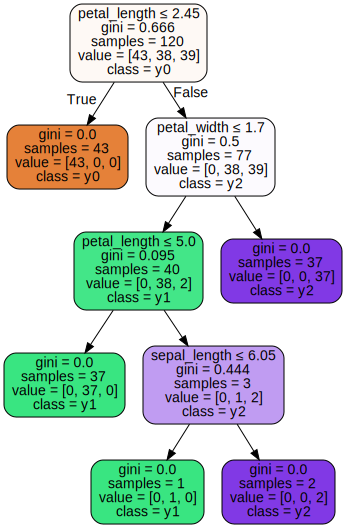

In [454]:
import graphviz
dot_data = tree.export_graphviz(decisionTreeClassifier, out_file=None, 
                         feature_names=list(irisData.columns)[:4],                         
                         class_names = True,        
                         filled=True, rounded=True,
                         proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 


# show it here
graph 

In [455]:
list(irisData.columns)[:4]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']